In [8]:
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import os

In [6]:
dir_path = "E:/Study and Work/The Sparks Foundation (TSF)/Task-2/images/"

In [7]:
img = Image.open(dir_path+"test1.jpeg")
img_plt = plt.imread(dir_path+"test1.jpeg")
img_cv = cv2.imread(dir_path+"test1.jpeg")

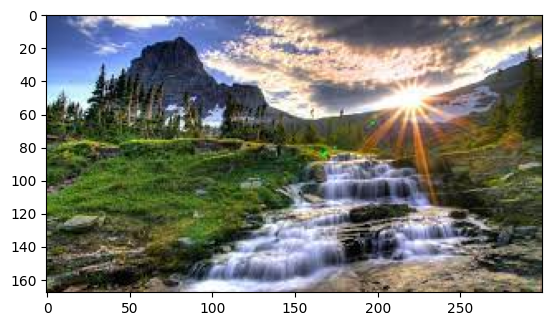

In [4]:
plt.imshow(img)

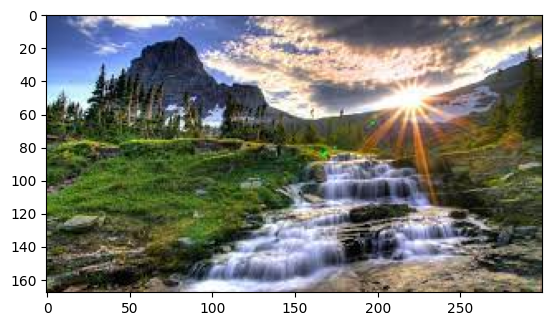

In [5]:
plt.imshow(img_plt)

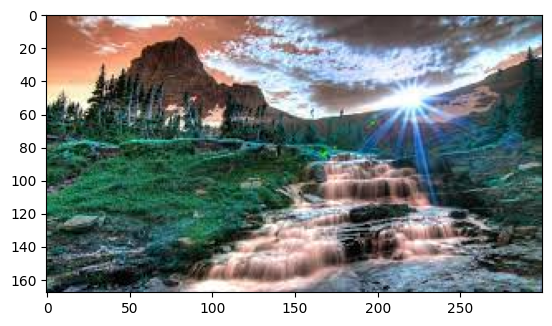

In [6]:
plt.imshow(img_cv)   # The default image-reading format in OpenCV is the BGR sequence

In [9]:
def BGR_to_RGB(image):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return rgb_image

def RGB_to_BGR(image):
    bgr_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return bgr_image

def BGR_to_GRAY(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

def RGB_to_GRAY(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return gray_image

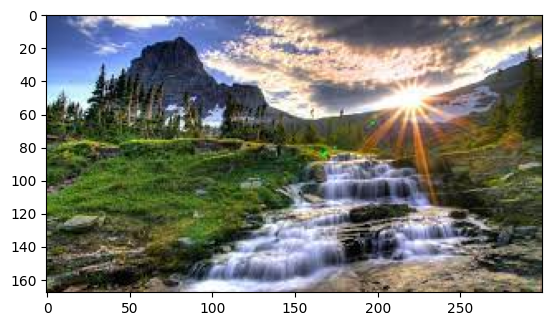

In [8]:
rgb = BGR_to_RGB(image=img_cv)
plt.imshow(rgb)

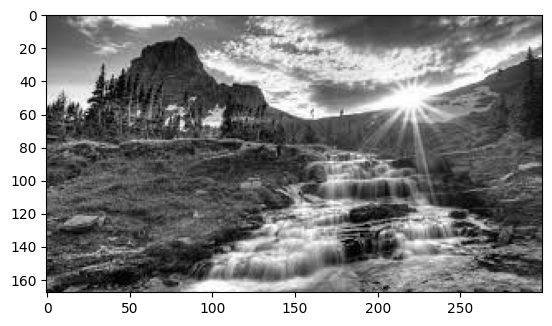

In [9]:
gray_from_bgr = BGR_to_GRAY(img_cv)
plt.imshow(gray_from_bgr, cmap="gray")

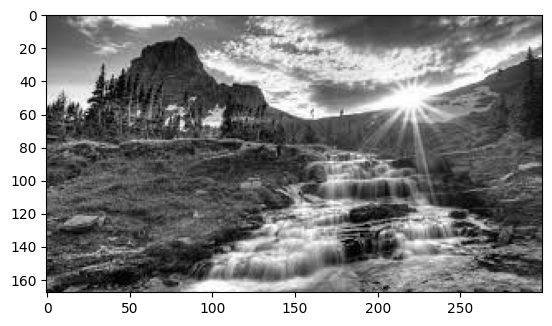

In [10]:
gray_from_rgb = RGB_to_GRAY(img_plt)
plt.imshow(gray_from_rgb, cmap="gray")

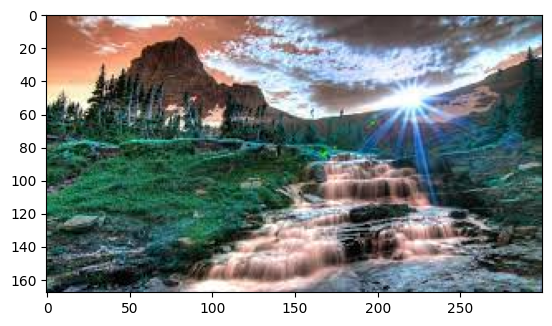

In [11]:
bgr_from_rgb = RGB_to_BGR(img_plt)  # Both img_plt and img are in RGB format, but img_plt is a numpy array which cv2.cvtColor expects
plt.imshow(bgr_from_rgb)

In [10]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [17]:
def get_image(path):
    image = cv2.imread(path)
    rgb_image = BGR_to_RGB(image=image)
    return rgb_image

def modify_image(image):    
    # modified_image = cv2.resize(image, resize_params, interpolation = cv2.INTER_AREA)
    modified_image = image.reshape(image.shape[0]*image.shape[1],3)
    return modified_image

def get_colors(image, no_of_colors:int, show_chart:bool=False):
    modified_image = modify_image(image=image)
    kmeans_classifer = KMeans(n_clusters=no_of_colors)
    labels = kmeans_classifer.fit_predict(modified_image)

    counts = Counter(labels)

    center_colors = kmeans_classifer.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (10, 10))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors

In [14]:
images = []
for file in os.listdir(dir_path):
    if not file.endswith(".txt") or not file.startswith('.'):
        images.append(get_image(dir_path + file))

len(images)

11

In [40]:
img_plt.shape

(168, 300, 3)

In [57]:
new_img = modify_image(image=img_plt)
# plt.imshow(new_img)

In [49]:
colors = get_colors(image=new_img, no_of_colors=4)

In [50]:
colors

[array([43.04517272, 50.5988281 , 30.32022893]),
 array([222.74591762, 216.56141847, 215.91323422]),
 array([92.01088579, 94.22704653, 73.02276686]),
 array([142.18503627, 142.20452758, 158.664365  ])]

[array([46.84590104, 56.04473252, 25.19079788]),
 array([79.74338448, 81.52390483, 86.08694685]),
 array([105.00638468, 107.42271881,  54.02420857]),
 array([ 96.03340471, 112.07494647, 164.25824411]),
 array([193.9901919 , 172.00341151, 153.11812367]),
 array([119.27403156, 149.95624103, 227.01219512]),
 array([50.16060017, 55.25201445, 63.32425674]),
 array([236.82178218, 212.21917192, 189.76732673]),
 array([186.77973379, 195.35036496, 222.78316874]),
 array([20.71071071, 26.04904905, 14.62337337]),
 array([241.43941842, 240.77059774, 238.92277868]),
 array([151.2627866 , 138.58024691, 121.37801293]),
 array([114.28494486, 109.83944601, 104.02769941]),
 array([74.54040316, 83.70815074, 38.39929886]),
 array([150.47016198, 152.65302643, 176.81884058])]

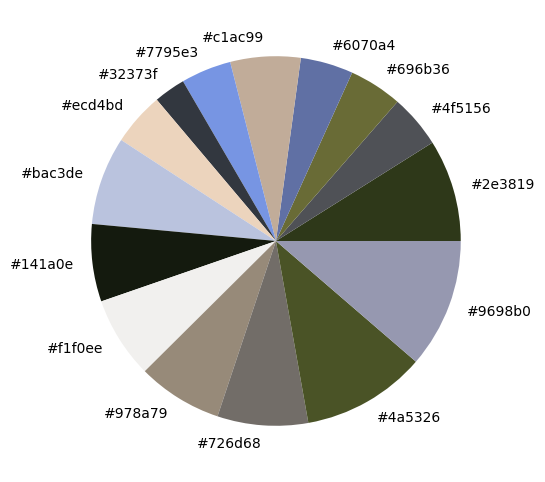

In [53]:
get_colors(new_img, no_of_colors=15, show_chart=True)

[array([245.80972696, 244.55588737, 241.07636519]),
 array([84.84138412, 94.8460288 , 42.71876451]),
 array([92.29792822, 90.88269624, 85.44966443]),
 array([130.51301518, 165.13882863, 239.16052061]),
 array([116.52217742, 114.07308468,  56.08064516]),
 array([120.76320331, 114.4370038 , 104.58163618]),
 array([166.60530191, 170.02209131, 195.99852725]),
 array([199.86594595, 209.40702703, 233.62864865]),
 array([66.20049234, 69.70158643, 75.32193654]),
 array([153.66992014, 138.52573203, 116.13664596]),
 array([ 99.22855182, 123.68359643, 196.1674674 ]),
 array([244.13623188, 221.97217391, 199.64927536]),
 array([217.00947568, 191.74542009, 170.94883133]),
 array([39.81766257, 45.56414763, 56.46441125]),
 array([132.87045889, 135.19694073, 157.17686424]),
 array([17.35929993, 22.12388469, 11.61461908]),
 array([ 86.74984967,  98.27961515, 137.39987974]),
 array([62.15788369, 71.32374554, 32.63804325]),
 array([181.19317073, 162.0204878 , 144.45609756]),
 array([40.1547619 , 48.701666

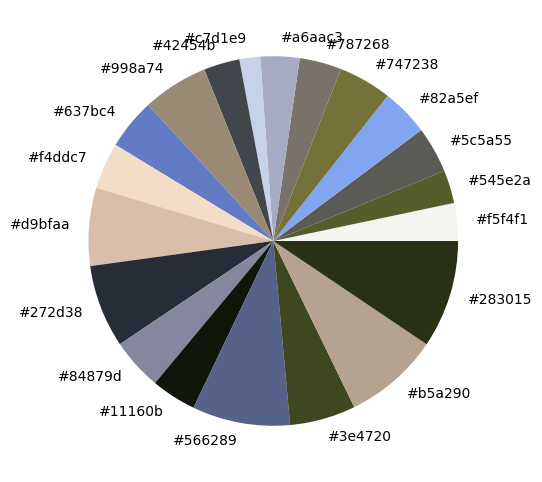

In [58]:
get_colors(new_img, no_of_colors=20, show_chart=True)

[array([132.0702381 , 167.13928571, 240.58809524]),
 array([249.17635564, 246.32193454, 239.70835369]),
 array([94.12514484, 92.24719969, 72.63229046]),
 array([211.82841181, 222.9481245 , 243.79569034]),
 array([122.78061027, 116.09617613,  95.47508691]),
 array([64.48860932, 68.42366542, 79.92009521]),
 array([141.7915601 , 143.11636829, 164.91943734]),
 array([217.87627464, 191.37185588, 169.30183549]),
 array([15.28763103, 19.79371069, 10.18532495]),
 array([53.78127786, 59.47369985, 39.66210996]),
 array([34.8517134 , 41.3470405 , 58.81744548]),
 array([243.63903282, 221.50086356, 199.37190558]),
 array([77.7296798 , 79.60160099, 47.54864532]),
 array([ 77.68432671,  98.64900662, 158.63134658]),
 array([125.27697842,  96.48291367,  43.9397482 ]),
 array([62.85302252, 79.2101936 , 21.62465429]),
 array([102.87304075, 127.94200627, 202.1669279 ]),
 array([ 90.74142599,  92.72698556, 105.64440433]),
 array([ 87.86099865, 113.57939721,  45.1448493 ]),
 array([183.37696904, 162.6295491

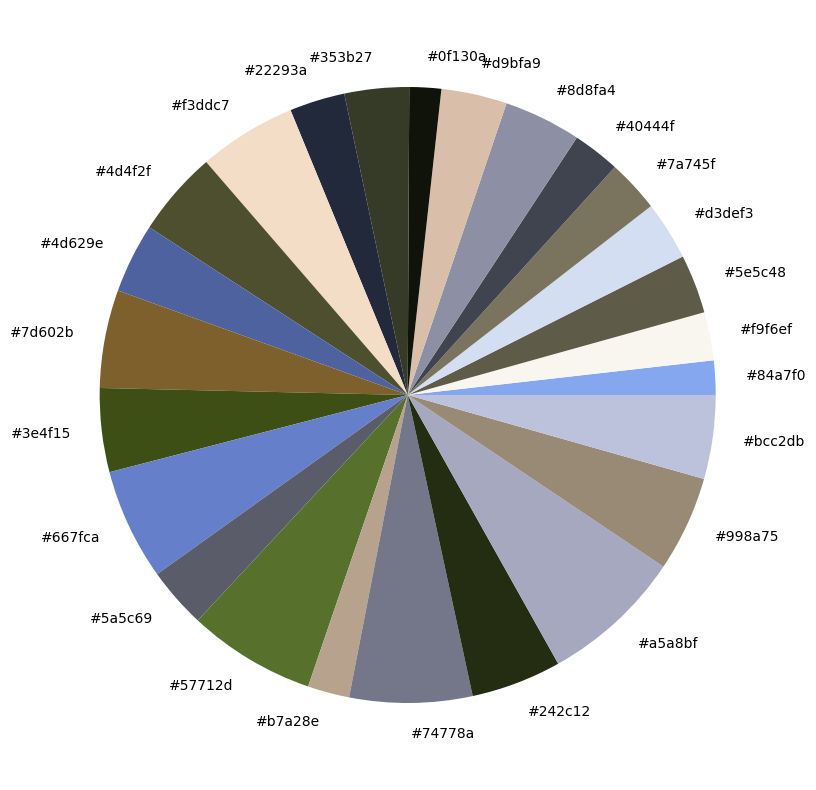

In [60]:
get_colors(new_img, no_of_colors=25, show_chart=True)

[array([220.15042431, 113.58985765,  45.43245278]),
 array([106.83453237, 106.38898197,  23.10968759]),
 array([237.22774844, 183.77445991,  86.12366779]),
 array([57.15458232, 51.35296026,  7.00291971]),
 array([154.86195915, 140.04996705,  51.20612783])]

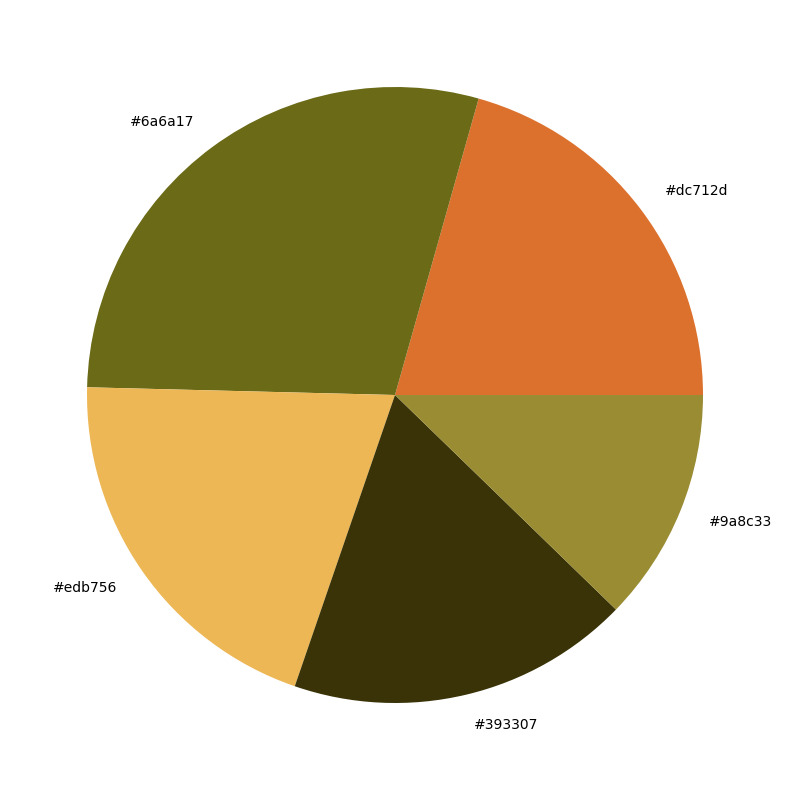

In [18]:
get_colors(images[8], 5, True)   # The open grassland field with orange sky image